<h1><center> TP1 - Benchetrit-Laborde - Analyse de données complexes </center></h1>

<h2><center> Import libraries </center></h2>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

In [16]:
# import data
conso = pd.read_csv("/Users/labordebarbara/Desktop/Données complexes/TP_irve_CY/cdc_data_conso.csv", sep=';', decimal=',')

In [17]:
conso.head()

,Id_IRVE,Horodate,Charge_kw
0,15145260,01/09/2019 00:10,0.48
1,15145260,01/09/2019 00:20,0.13
2,15145260,01/09/2019 00:30,0.96
3,15145260,01/09/2019 00:40,0.20
4,15145260,01/09/2019 00:50,0.74


In [18]:
# format datetime in conso dataframe
conso.Horodate = pd.to_datetime(conso.Horodate, format='%d/%m/%Y %H:%M')
conso.head()

,Id_IRVE,Horodate,Charge_kw
0,15145260,2019-09-01 00:10:00,0.48
1,15145260,2019-09-01 00:20:00,0.13
2,15145260,2019-09-01 00:30:00,0.96
3,15145260,2019-09-01 00:40:00,0.20
4,15145260,2019-09-01 00:50:00,0.74


<h2><center> Question 1 </center></h2>

### Power

In [19]:
bins = [-0.5, 2, 12, 31, 60, 105, 186, 256, 352, 516]
conso['Charge_bin'] = pd.cut(conso.Charge_kw, bins)
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin
0,15145260,2019-09-01 00:10:00,0.48,"(-0.5, 2.0]"
1,15145260,2019-09-01 00:20:00,0.13,"(-0.5, 2.0]"
2,15145260,2019-09-01 00:30:00,0.96,"(-0.5, 2.0]"
3,15145260,2019-09-01 00:40:00,0.20,"(-0.5, 2.0]"
4,15145260,2019-09-01 00:50:00,0.74,"(-0.5, 2.0]"


In [20]:
intervals = list(pd.cut(conso.Charge_kw, bins).values.unique())

binnames = ['<2', '2to12', '12to31', '31to60', '60to105',
            '105to186', '186to256', '256to352', '352to516',
            '>516']

for (interval, binname) in zip(intervals, binnames):
    conso.Charge_bin.replace({interval: binname}, inplace=True)
    
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin
0,15145260,2019-09-01 00:10:00,0.48,<2
1,15145260,2019-09-01 00:20:00,0.13,<2
2,15145260,2019-09-01 00:30:00,0.96,<2
3,15145260,2019-09-01 00:40:00,0.20,<2
4,15145260,2019-09-01 00:50:00,0.74,<2


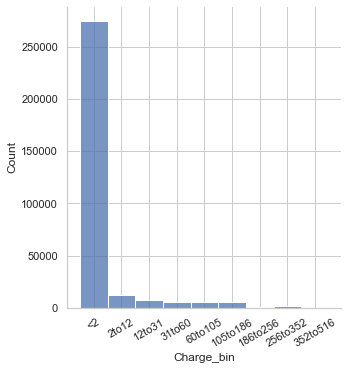

In [21]:
g = sns.displot(data=conso, x="Charge_bin")
g.set_xticklabels(rotation=30)

### Power supply per hour

In [22]:
#add usefull columns
conso['Hour'] = conso.Horodate.dt.hour
conso['Weekday'] = conso.Horodate.dt.day_name()
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin,Hour,Weekday
0,15145260,2019-09-01 00:10:00,0.48,<2,0,Sunday
1,15145260,2019-09-01 00:20:00,0.13,<2,0,Sunday
2,15145260,2019-09-01 00:30:00,0.96,<2,0,Sunday
3,15145260,2019-09-01 00:40:00,0.20,<2,0,Sunday
4,15145260,2019-09-01 00:50:00,0.74,<2,0,Sunday


In [23]:
conso_per_hour = conso.groupby('Hour').mean()
conso_per_hour.drop(['Id_IRVE'], axis=1, inplace=True)
conso_per_hour.reset_index(inplace=True)
conso_per_hour.head()

,Hour,Charge_kw
0,0,2.435643
1,1,1.899655
2,2,1.175062
3,3,0.932299
4,4,1.015316


In [24]:
bins = np.linspace(0, 24, 9)
binranges = ['00-03hr', '03-06hr', '06-09hr',
            '09-12hr', '12-15hr', '15-18hr',
            '18-21hr', '21-24hr']
digitized = np.digitize(conso_per_hour.Hour, bins)
conso_per_hour['Hour_range'] = digitized
for (i, binrange) in enumerate(binranges):
    conso_per_hour.Hour_range.replace({i+1: binrange}, inplace=True)
conso_per_hour

,Hour,Charge_kw,Hour_range
0,0,2.435643,00-03hr
1,1,1.899655,00-03hr
2,2,1.175062,00-03hr
3,3,0.932299,03-06hr
4,4,1.015316,03-06hr
5,5,1.331142,03-06hr
6,6,1.805627,06-09hr
7,7,3.050649,06-09hr
8,8,4.043680,06-09hr
9,9,6.400183,09-12hr


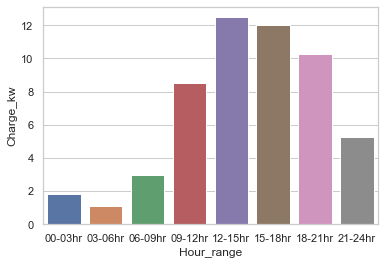

In [25]:
sns.set_theme(style="whitegrid")
sns.barplot(data=conso_per_hour, x='Hour_range', y='Charge_kw', ci=None)

### Power supply per day

In [26]:
conso_per_day = conso.groupby('Weekday').mean()
conso_per_day.drop(['Id_IRVE', 'Hour'], axis=1, inplace=True)
conso_per_day.reset_index(inplace=True)

new_index = [1, 5, 6, 4, 0, 2, 3]
conso_per_day = conso_per_day.reindex(new_index).reset_index(drop=True)

conso_per_day

,Weekday,Charge_kw
0,Monday,8.221156
1,Tuesday,6.505087
2,Wednesday,5.296453
3,Thursday,5.479408
4,Friday,6.346277
5,Saturday,7.758000
6,Sunday,7.506851


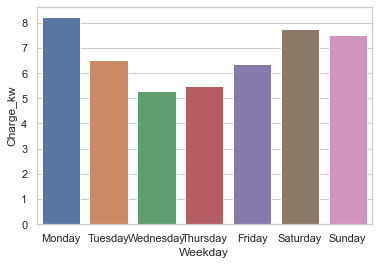

In [27]:
sns.set_theme(style="whitegrid")
sns.barplot(data=conso_per_day, x='Weekday', y='Charge_kw', ci=None)

<h2><center> Question 2 </center></h2>

In [104]:
conso.head()

,Id_IRVE,Horodate,Charge_kw,Charge_bin,Hour,Weekday
0,15145260,2019-09-01 00:10:00,0.48,<2,0,Sunday
1,15145260,2019-09-01 00:20:00,0.13,<2,0,Sunday
2,15145260,2019-09-01 00:30:00,0.96,<2,0,Sunday
3,15145260,2019-09-01 00:40:00,0.20,<2,0,Sunday
4,15145260,2019-09-01 00:50:00,0.74,<2,0,Sunday


In [105]:
# Transformation des variables explicatives construites sur les cdc 
conso_dummy=pd.get_dummies(conso,columns=['Charge_bin','Weekday'])
conso_dummy.head()

,Id_IRVE,Horodate,Charge_kw,Hour,Charge_bin_105to186,Charge_bin_12to31,Charge_bin_186to256,Charge_bin_256to352,Charge_bin_2to12,Charge_bin_31to60,Charge_bin_352to516,Charge_bin_60to105,Charge_bin_<2,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,15145260,2019-09-01 00:10:00,0.48,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,15145260,2019-09-01 00:20:00,0.13,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,15145260,2019-09-01 00:30:00,0.96,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,15145260,2019-09-01 00:40:00,0.20,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,15145260,2019-09-01 00:50:00,0.74,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [112]:
conso_dummy.groupby('Id_IRVE').mean()

,Charge_kw,Hour,Charge_bin_105to186,Charge_bin_12to31,Charge_bin_186to256,Charge_bin_256to352,Charge_bin_2to12,Charge_bin_31to60,Charge_bin_352to516,Charge_bin_60to105,Charge_bin_<2,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
Id_IRVE,,,,,,,,,,,,,,,,,,
15145260,1.117784,11.502663,0.0,0.025932,0.0,0.0,0.028710,0.000695,0.0,0.00000,0.944663,0.133364,0.166705,0.133364,0.166474,0.133364,0.133364,0.133364
16101777,0.998102,11.508267,0.0,0.012940,0.0,0.0,0.046729,0.000000,0.0,0.00000,0.940331,0.138030,0.172538,0.138030,0.171819,0.138030,0.104242,0.137311
16190212,3.271591,11.500000,0.0,0.030495,0.0,0.0,0.032307,0.040459,0.0,0.00151,0.895229,0.130435,0.173913,0.130435,0.173913,0.130435,0.130435,0.130435
16190229,1.320996,11.500000,0.0,0.030495,0.0,0.0,0.024155,0.000000,0.0,0.00000,0.945350,0.130435,0.173913,0.130435,0.173913,0.130435,0.130435,0.130435
16195843,2.288228,11.500000,0.0,0.027174,0.0,0.0,0.027174,0.023249,0.0,0.00000,0.922403,0.130435,0.173913,0.130435,0.173913,0.130435,0.130435,0.130435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70129018,1.006984,11.507992,0.0,0.004864,0.0,0.0,0.067408,0.000000,0.0,0.00000,0.927728,0.133426,0.166782,0.133426,0.166088,0.133426,0.133426,0.133426
77452640,2.362787,11.507992,0.0,0.025712,0.0,0.0,0.023628,0.027797,0.0,0.00000,0.922863,0.133426,0.166782,0.133426,0.166088,0.133426,0.133426,0.133426
78976290,1.183989,11.507992,0.0,0.011814,0.0,0.0,0.079917,0.000000,0.0,0.00000,0.908270,0.133426,0.166782,0.133426,0.166088,0.133426,0.133426,0.133426


In [106]:
# On retire la variable Horodate
del conso_dummy['Horodate']
conso_dummy.head()

,Id_IRVE,Charge_kw,Hour,Charge_bin_105to186,Charge_bin_12to31,Charge_bin_186to256,Charge_bin_256to352,Charge_bin_2to12,Charge_bin_31to60,Charge_bin_352to516,Charge_bin_60to105,Charge_bin_<2,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,15145260,0.48,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,15145260,0.13,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,15145260,0.96,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,15145260,0.20,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,15145260,0.74,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [107]:
# On normalise le dataframe avant de faire l'ACP
normalized_df=(conso_dummy-conso_dummy.mean())/conso_dummy.std()
normalized_df

,Id_IRVE,Charge_kw,Hour,Charge_bin_105to186,Charge_bin_12to31,Charge_bin_186to256,Charge_bin_256to352,Charge_bin_2to12,Charge_bin_31to60,Charge_bin_352to516,Charge_bin_60to105,Charge_bin_<2,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,-0.344199,-0.228823,-1.663486,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,-0.447303,-0.394419,2.240924,-0.391794,-0.390725,-0.39102
1,-0.344199,-0.241479,-1.663486,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,-0.447303,-0.394419,2.240924,-0.391794,-0.390725,-0.39102
2,-0.344199,-0.211467,-1.663486,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,-0.447303,-0.394419,2.240924,-0.391794,-0.390725,-0.39102
3,-0.344199,-0.238948,-1.663486,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,-0.447303,-0.394419,2.240924,-0.391794,-0.390725,-0.39102
4,-0.344199,-0.219422,-1.663486,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,-0.447303,-0.394419,2.240924,-0.391794,-0.390725,-0.39102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311344,6.089874,-0.231355,1.660602,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,2.235612,-0.394419,-0.446243,-0.391794,-0.390725,-0.39102
311345,6.089874,-0.201342,1.660602,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,2.235612,-0.394419,-0.446243,-0.391794,-0.390725,-0.39102
311346,6.089874,-0.215083,1.660602,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,2.235612,-0.394419,-0.446243,-0.391794,-0.390725,-0.39102
311347,6.089874,-0.189047,1.660602,-0.129522,-0.15509,-0.038466,-0.061758,-0.202772,-0.12769,-0.01747,-0.130378,0.365451,-0.39412,2.235612,-0.394419,-0.446243,-0.391794,-0.390725,-0.39102


In [83]:
# On fait l'ACP
pca = PCA(n_components=10,random_state=33)
pca.fit(normalized_df)

PCA(n_components=10, random_state=33)

In [84]:
# On étudie les composantes de notre ACP pour pouvoir l'interpréter
pca.explained_variance_

array([2.56538621, 1.38860951, 1.1984616 , 1.1806232 , 1.15551041,
       1.1542541 , 1.15337754, 1.15246237, 1.03199737, 1.01825485])

In [85]:
# On étudie les composantes de notre ACP pour pouvoir l'interpréter
pca.singular_values_

array([893.71576354, 657.52626859, 610.85073697, 606.2876152 ,
       599.80484698, 599.478694  , 599.25102511, 599.0132347 ,
       566.84240964, 563.0556022 ])

In [86]:
# On étudie les composantes de notre ACP pour pouvoir l'interpréter
# Chaque ligne représente le vecteur propre de chaque dimension
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.564197,0.131829,0.334350,0.166162,0.177132,0.223939,0.178660,0.178231,0.103216,0.244976,-0.554399,-0.006094,0.017142,0.018548,0.012907,-0.019574,-0.005675,-0.020262
1,0.350332,-0.141086,0.236403,-0.337700,0.267524,0.276046,-0.564818,-0.157302,0.180766,0.003987,0.371820,-0.025848,0.133940,-0.022486,0.008109,-0.042112,-0.002044,-0.063250
2,0.026941,-0.011652,0.026344,-0.018041,0.025039,0.027827,-0.045825,-0.009044,-0.007183,-0.016883,0.028083,-0.026712,-0.638075,-0.024976,0.763023,-0.031982,-0.012638,-0.039326
3,0.058305,-0.015545,0.049870,-0.050101,0.040883,0.039632,-0.057118,-0.037246,0.004613,0.013540,0.034784,0.273393,-0.638083,0.306926,-0.503575,0.215628,0.264247,0.189865
4,0.005608,0.007469,-0.004173,-0.012151,0.013761,0.019690,0.030890,-0.035398,0.010241,-0.004892,-0.001515,0.848432,-0.000666,-0.427146,0.002485,-0.236093,-0.196818,0.007657
5,-0.004962,-0.027787,-0.014383,-0.028725,0.031373,-0.001285,0.032444,-0.025924,0.025358,-0.018820,0.012297,0.071780,0.014548,0.646615,0.021092,-0.387218,-0.605808,0.231196
6,0.005535,0.005372,0.008344,-0.009678,-0.000491,0.020424,0.008427,0.000173,-0.002638,-0.020358,0.000490,-0.180347,-0.014035,-0.190188,-0.013087,-0.619788,0.407103,0.616387
7,0.034411,0.008966,0.039694,-0.048235,0.029496,0.011379,0.009408,-0.028544,0.023239,-0.007175,0.008324,-0.167605,-0.058928,-0.361190,-0.027853,0.473782,-0.468351,0.621007
8,-0.010298,0.192915,-0.044200,0.728511,-0.074636,-0.064696,-0.626342,0.132907,-0.049545,0.022508,0.016800,0.027396,-0.008862,0.004699,-0.014465,-0.009637,-0.052705,0.055653
9,-0.002918,-0.044059,-0.361741,-0.339124,-0.055476,-0.076441,-0.205206,0.633371,-0.041526,0.543768,-0.013407,0.021958,-0.016825,-0.008304,0.003165,-0.008862,-0.021722,0.031873


In [87]:
# On étudie les composantes de notre ACP pour pouvoir l'interpréter
pca.explained_variance_ratio_

array([0.14252146, 0.07714497, 0.0665812 , 0.06559018, 0.06419502,
       0.06412523, 0.06407653, 0.06402569, 0.05733319, 0.05656971])

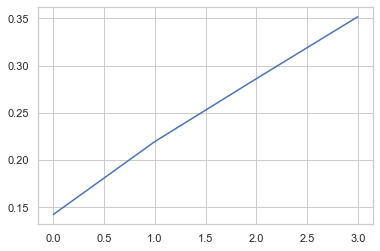

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

<h2><center> Question 6 </center></h2>

In [125]:
environnement=pd.read_csv("/Users/labordebarbara/Desktop/Données complexes/TP_irve_CY/irve_environnement.csv", sep=';', decimal=',', encoding='latin-1')
environnement.head()

,ID_IRVE,AdresseVille,typeQuartier,TypeEmplacement,CentreVille,Type_commune,Nb_habitants
0,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
1,16101777,Nîmes,Administrations,Grande_voie,non,5_Grande_Ville,151001
2,16190212,Guingamp,ZAC,Grande_voie,non,3_Petite_Ville,6899
3,16190229,Merdrignac,Administrations,Grande_voie,non,2_Bourg,2940
4,16195843,Rostrenen,ZAC,Grande_voie,non,2_Bourg,3062


In [131]:
merged=pd.merge(conso,environnement, how='left', left_on='Id_IRVE', right_on='ID_IRVE')

In [132]:
merged

,Id_IRVE,Horodate,Charge_kw,Charge_bin,Hour,Weekday,ID_IRVE,AdresseVille,typeQuartier,TypeEmplacement,CentreVille,Type_commune,Nb_habitants
0,15145260,2019-09-01 00:10:00,0.48,<2,0,Sunday,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
1,15145260,2019-09-01 00:20:00,0.13,<2,0,Sunday,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
2,15145260,2019-09-01 00:30:00,0.96,<2,0,Sunday,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
3,15145260,2019-09-01 00:40:00,0.20,<2,0,Sunday,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
4,15145260,2019-09-01 00:50:00,0.74,<2,0,Sunday,15145260,Castres,Administrations,voirie,non,4_Ville_Moyenne,41338
...,...,...,...,...,...,...,...,...,...,...,...,...,...
311344,99443934,2019-09-30 23:10:00,0.41,<2,23,Monday,99443934,Menton,ZAC,Grande_voie,non,4_Ville_Moyenne,28486
311345,99443934,2019-09-30 23:20:00,1.24,<2,23,Monday,99443934,Menton,ZAC,Grande_voie,non,4_Ville_Moyenne,28486
311346,99443934,2019-09-30 23:30:00,0.86,<2,23,Monday,99443934,Menton,ZAC,Grande_voie,non,4_Ville_Moyenne,28486
311347,99443934,2019-09-30 23:40:00,1.58,<2,23,Monday,99443934,Menton,ZAC,Grande_voie,non,4_Ville_Moyenne,28486
